<a href="https://colab.research.google.com/github/2021BUSTER/deep_learning_yeji/blob/main/13_Sonar(%EA%B3%BC%EC%A0%81%ED%95%A9%EB%B0%A9%EC%A7%80%2C_k%EA%B2%B9_%EA%B5%90%EC%B0%A8_%EA%B2%80%EC%A6%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과적합 (overfitting)
: 학습 데이터셋 안에서는 일정 수준 이상의 예측 정확도를 보이지만
  새로운 데이터에 적용하면 잘 맞지 않음

  > 층이 너무 많거나


  > 변수가 복잡하거나

  
  > 테스트셋과 학습셋이 중복 될 경우 발생




## 과적합 방지!!
: 학습 데이터셋과 테스트 데이터셋을 완전히 구분 후 학습과 테스트를 동시에 병행해야 함.
> 학습이 계속되면 학습셋 정확도는 올라가지만 테스트셋에서는 과적합이 발생!!



In [ ]:
# 데이터 입력
from google.colab import files
uploaded = files.upload()
my_data = 'sonar.csv'

!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import pandas as pd
import numpy

from keras.models import Sequential, load_model
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

#데이터 적용
df = pd.read_csv(my_data, header=None)
'''
print(df.info())
print(df.head())
'''
dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
# 학습셋과 테스트셋을 나눔
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed) # data의 70% -> 학습셋 ,  30% -> 테스트셋으로 구분

model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=130, batch_size=5)
model.save('my_model.h5')  # 모델을 컴퓨터에 저장

del model       # 테스트를 위해 메모리 내의 모델을 삭제
model = load_model('my_model.h5') # 모델을 새로 불러옴

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))  # 불러온 모델로 테스트 실행



Saving sonar.csv to sonar.csv
     |████████████████████████████████| 411.5MB 42kB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 3.8MB 45.6MB/s 
     |████████████████████████████████| 512kB 9.4MB/s 
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
TensorFlow 1.x selected.


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/130
145/145 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.5379
Epoch 2/130
145/145 [==============================] - 0s 365us/step - loss: 0.2331 - accuracy: 0.5724
Epoch 3/130
145/145 [==============================] - 0s 414us/step - loss: 0.2222 - accuracy: 0.7034
Epoch 4/130
145/145 [==============================] - 0s 354us/step - loss: 0.2118 - accuracy: 0.7034
Epoch 5/130
145/145 [==============================] - 0s 363us/step - loss: 0.2034 - accuracy: 0.7241
Epoch 6/130
145/145 [==============================] - 0s 365us/step - loss: 0.1967 - accuracy: 0.7793
Epoch 7/130
145/145 [==============================] - 0s 356us/step - loss: 0.1873 - accuracy: 0.7724
Epoch 8/130
145/145 [==============================] - 0s 338us/step - loss: 0.1774 - accuracy: 0.7586
Epoch 9/130
145/145 [==============================] - 0s 300us/step - loss: 0.1662 - accuracy: 

# k겹 교차 검증
: 데이터셋을 여러개로 나누어 하나씩 테스트셋으로 사용하고 나머지를 모두 합해서 학습셋으로 사용.
> 데이터 100%를 테스트셋으로 사용가능


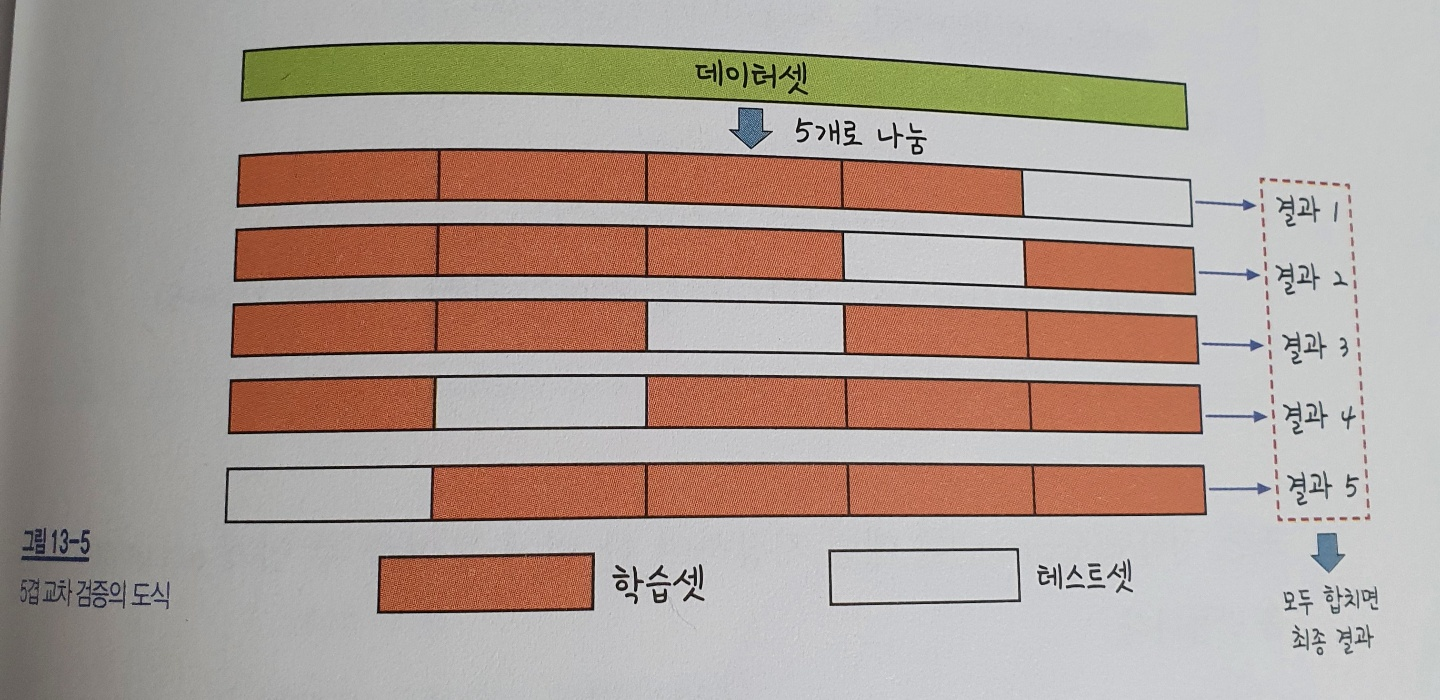

In [ ]:
# 데이터 입력
from google.colab import files
uploaded = files.upload()
my_data = 'sonar.csv'

!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import pandas as pd
import numpy

from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

# 데이터 적용
df = pd.read_csv(my_data, header=None)

dataset = df.values
X = dataset[:,0:60]
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 10개의 파일로 쪼갬
n_fold = 10     #10차 교차 검증
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

# 빈 accuracy 배열
accuracy = []

# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):   # n_fold만큼 모델을 만들고 실행
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5) 
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])   # 정확도를 저장하여 한번에 보여주기 위함
    accuracy.append(k_accuracy)

# 결과 출력
print("\n %.f fold accuracy:" % n_fold, accuracy)


Saving sonar.csv to sonar (1).csv
Epoch 1/100
187/187 [==============================] - 0s 2ms/step - loss: 0.2469 - acc: 0.5348
Epoch 2/100
187/187 [==============================] - 0s 240us/step - loss: 0.2287 - acc: 0.7380
Epoch 3/100
187/187 [==============================] - 0s 240us/step - loss: 0.2167 - acc: 0.6738
Epoch 4/100
187/187 [==============================] - 0s 248us/step - loss: 0.1971 - acc: 0.7166
Epoch 5/100
187/187 [==============================] - 0s 239us/step - loss: 0.1880 - acc: 0.7701
Epoch 6/100
187/187 [==============================] - 0s 233us/step - loss: 0.1745 - acc: 0.8021
Epoch 7/100
187/187 [==============================] - 0s 256us/step - loss: 0.1658 - acc: 0.8289
Epoch 8/100
187/187 [==============================] - 0s 249us/step - loss: 0.1583 - acc: 0.7914
Epoch 9/100
187/187 [==============================] - 0s 247us/step - loss: 0.1501 - acc: 0.8128
Epoch 10/100
187/187 [==============================] - 0s 244us/step - loss: 0.1408 -